In [26]:
from dolfin import *
import numpy as np
from mshr import *
import matplotlib.pyplot as plt

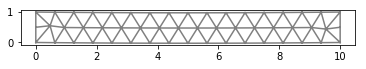

In [27]:
Lx, Ly = 10., 1
nx = 1
geom = Rectangle(Point(0,0),Point(Lx,Ly))
mesh = generate_mesh(geom,10)
n = mesh.geometry().dim() # number of space dimensions
u0 = Expression(("0","p*x[0]*(x[0]-Lx)"),p=0.001,Lx=Lx,Ly=Ly,degree=2)
ALE.move(mesh,u0)
plot(mesh)

In [28]:
# Mark boundary subdomians
left = CompiledSubDomain("near(x[0],0) && on_boundary")
right = CompiledSubDomain("near(x[0],L) && on_boundary", L=Lx)

# Mark facets for Neuman BCs
boundary_markers = MeshFunction("size_t", mesh,1,0)
left.mark(boundary_markers, 1)
right.mark(boundary_markers, 2)


EE, nu = 70.e9, 0.3
mu = Expression('EE/(2*(1 + nu))',EE=EE, nu=nu, degree=0)
lmbda = Expression('EE*nu/((1 + nu)*(1 - 2*nu))', EE=EE, nu=nu, degree=0)



In [29]:
V= VectorFunctionSpace(mesh, 'P', 1)

u = Function(V)
u_trial = TrialFunction(V)
u_test = TestFunction(V)

In [30]:
dim = u.geometric_dimension()  # space dimension
Id = Identity(dim)
F = variable(grad(u) + Id)
C = F.T*F
E = 1./2.*(C-Id)
J = det(F)
W_KSV = lmbda/2.*tr(E)**2 + mu*inner(E,E)
b = Expression(("0.","t"), t=0., degree=0)
energy = W_KSV*dx - dot(b,u)*dx
denergy = derivative(energy,u,u_test)
ddenergy = derivative(denergy,u,u_trial)
bc = DirichletBC(V, Constant((0.,0.)), boundary_markers, 1)

S =  diff(W_KSV,F)
Sxx = S[0,0]



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0.0
0.0
0.0
0.0
0.0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0.0
0.0
0.0
0.0
0.0


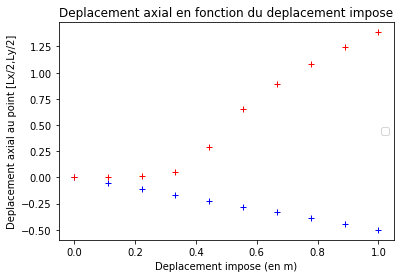

In [45]:
depla = np.linspace(0,1.,10)
for t in depla:
    bcu  = DirichletBC(V, Constant((-t,0.)), boundary_markers, 2)
    bcs =[bc,bcu]
    problem = NonlinearVariationalProblem(denergy, u, bcs=bcs, J =ddenergy)
    solver = NonlinearVariationalSolver(problem)
    solver.solve()
    #plt.figure()
    #plot(u, mode="displacement")
    #plt.title('Flambement de la poutre pour p = 0.001')
    plt.plot(t,u(Lx/2,Ly/2)[0],'b+')
    plt.plot(t,-u(Lx/2,Ly/2)[1],'r+')
    plt.ylabel('Deplacement axial au point [Lx/2,Ly/2]')
    plt.xlabel('Deplacement impose (en m)')
    plt.title('Deplacement axial en fonction du deplacement impose')
    plt.legend(loc=5)
    reac = assemble(Sxx*ds(0)) 
    print(reac)
    #plt.figure(2)
    #plt.plot(t,reac,'b+')
    #plt.ylabel('Force (en N)')
    #plt.xlabel('Deplacement (en m)')
    #plt.title('Force en fonction du deplacement')